### Instalasi Library

In [1]:
!pip install kaggle

### Download Datasets dari Kaggle

In [2]:
# Membuat direktori “.kaggle”
! mkdir ~/.kaggle

In [3]:
# copy 'kaggle.json' ke dalam direktori baru
! cp kaggle.json ~/.kaggle/

In [4]:
# Alokasikan izin yang diperlukan untuk file ini.
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Donwload datasets dari kaggle
! kaggle datasets download hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

 83% 39.0M/47.0M [00:00<00:00, 73.7MB/s]
100% 47.0M/47.0M [00:00<00:00, 84.7MB/s]


In [6]:
# Unzip
! unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe 

### Import Library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import pathlib
import glob
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import shutil

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from PIL import Image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
data_dir = pathlib.Path('/content/Shoe vs Sandal vs Boot Dataset')
print(data_dir)
list(data_dir.glob('*/*'))[:5]

/content/Shoe vs Sandal vs Boot Dataset


[PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (765).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (3305).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (1211).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (2668).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (3002).jpg')]

In [21]:
# Mencari semua file di folder dan subfolder
all_files = glob.glob(os.path.join(data_dir, '**/*'), recursive=True)

# Menghitung jumlah seluruh datasets
total_datasets = len(all_files)

print("Jumlah seluruh datasets:", total_datasets)


Jumlah seluruh datasets: 15003


In [22]:
boot = list(data_dir.glob('Boot/*.jpg'))
boot[:10]

[PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1522).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (4610).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1140).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (3187).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1612).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1031).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (3063).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (2130).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (1245).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Boot/boot (3602).jpg')]

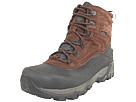

In [23]:
PIL.Image.open(str(boot[5]))

In [24]:
shoe = list(data_dir.glob('Shoe/*.jpg'))
shoe[:5]

[PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1058).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1550).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1678).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (2324).jpg'),
 PosixPath('/content/Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (56).jpg')]

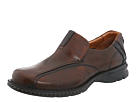

In [25]:
PIL.Image.open(str(shoe[9]))

In [36]:
# Path ke file gambar
image_path = '/content/Shoe vs Sandal vs Boot Dataset/Sandal/Sandal (3543).jpg'

# Membuka gambar menggunakan PIL
image = Image.open(image_path)

# Mendapatkan ukuran gambar
width, height = image.size

print("Ukuran gambar:", width, "x", height)

Ukuran gambar: 136 x 102


### Pre-Processing

In [38]:
!pip install split-folders

In [40]:
import splitfolders

input_folder = data_dir
splitfolders.ratio(input_folder, output='/content/new-datasets',
                  seed=42, ratio=(.8, .2),
                  group_prefix=None)

Copying files: 15000 files [00:02, 5038.04 files/s]


In [41]:
def count_files(path):
    count = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for file in filenames:
            count += 1
    return count

# Path ke root folder
root_folder_train_path = '/content/new-datasets/train'
root_folder_val_path = '/content/new-datasets/val'

# Menghitung jumlah files
num_train_files = count_files(root_folder_train_path)
num_val_files = count_files(root_folder_val_path)

# Print jumlah file pada folder training dan validasi
print(f'Number of files in {root_folder_train_path} and its subfolders: {num_train_files}')
print(f'Number of files in {root_folder_val_path} and its subfolders: {num_val_files}')

Number of files in /content/new-datasets/train and its subfolders: 12000
Number of files in /content/new-datasets/val and its subfolders: 3000


In [64]:
# Path folder yang sudah dipisahkan menjadi data train dan val
datasets_dir = '/content/new-datasets'
train_dir = datasets_dir+'/train'
val_dir = datasets_dir+'/val'

# Mendefinisikan image size dan batch size
IMAGE_SIZE = (100, 100)

BATCH_SIZE = 32


# Create ImageDataGenerator for training set with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                   )

# Create ImageDataGenerator for validation sets without data augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255)

In [65]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='categorical',
                                                    target_size=IMAGE_SIZE,
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    seed=42
                                                    )

val_generator = val_datagen.flow_from_directory(val_dir,
                                                class_mode='categorical',
                                                target_size=IMAGE_SIZE,
                                                batch_size=BATCH_SIZE,
                                                  )

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [66]:
# Melihat kelas pada datasets
train_generator.class_indices

{'Boot': 0, 'Sandal': 1, 'Shoe': 2}

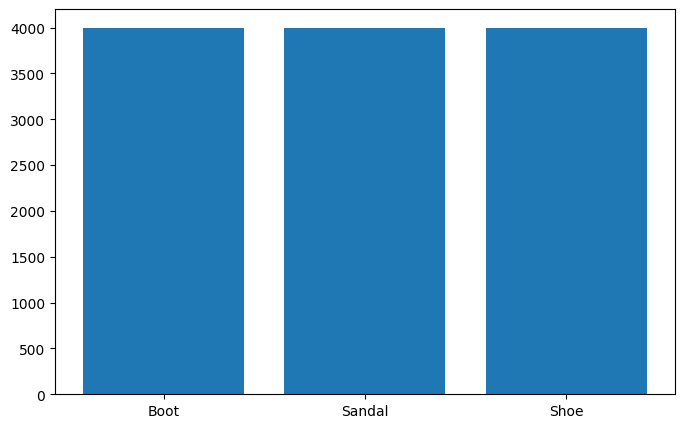

In [68]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_generator.classes
from collections import OrderedDict
classes = list(train_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(3):
    num_values.append(valdict[i])
plt.figure(figsize=(8,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()

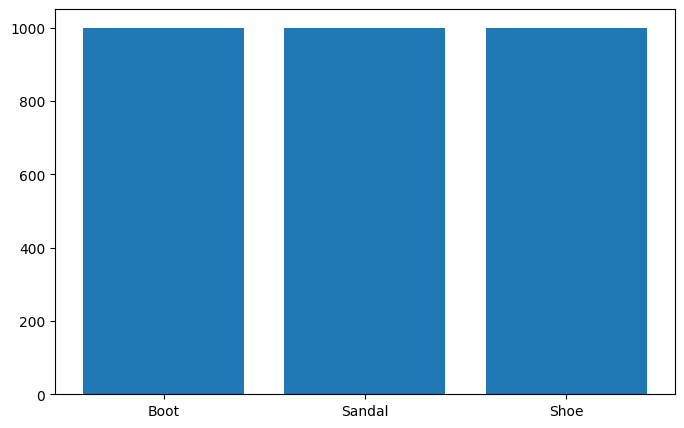

In [69]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = val_generator.classes
from collections import OrderedDict
classes = list(val_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(3):
    num_values.append(valdict[i])
plt.figure(figsize=(8,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()

### Processing

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 10, 10, 128)     

In [82]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [83]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [87]:
# calculating computational time
t = time.perf_counter()

# Train model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[callbacks])

# show total elapsed time
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('\nTraining time:', elapsed_time)

Epoch 1/25
375/375 [==============================] - 43s 115ms/step - loss: 0.3442 - accuracy: 0.8643 - val_loss: 0.2153 - val_accuracy: 0.9183
Epoch 2/25
375/375 [==============================] - 43s 114ms/step - loss: 0.3436 - accuracy: 0.8657 - val_loss: 0.3017 - val_accuracy: 0.8670
Epoch 3/25
375/375 [==============================] - 45s 120ms/step - loss: 0.3352 - accuracy: 0.8659 - val_loss: 0.2357 - val_accuracy: 0.9093
Epoch 4/25
375/375 [==============================] - 44s 117ms/step - loss: 0.3107 - accuracy: 0.8817 - val_loss: 0.1943 - val_accuracy: 0.9253
Epoch 5/25
375/375 [==============================] - 44s 117ms/step - loss: 0.3009 - accuracy: 0.8792 - val_loss: 0.1954 - val_accuracy: 0.9247
Epoch 6/25
375/375 [==============================] - 43s 114ms/step - loss: 0.2961 - accuracy: 0.8870 - val_loss: 0.2708 - val_accuracy: 0.8887
Epoch 7/25
375/375 [==============================] - 43s 115ms/step - loss: 0.2823 - accuracy: 0.8912 - val_loss: 0.1722 - val_ac

### Grafik Evaluasi Training

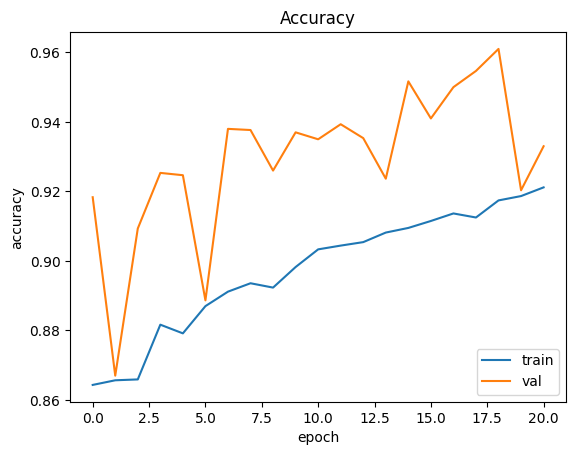

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

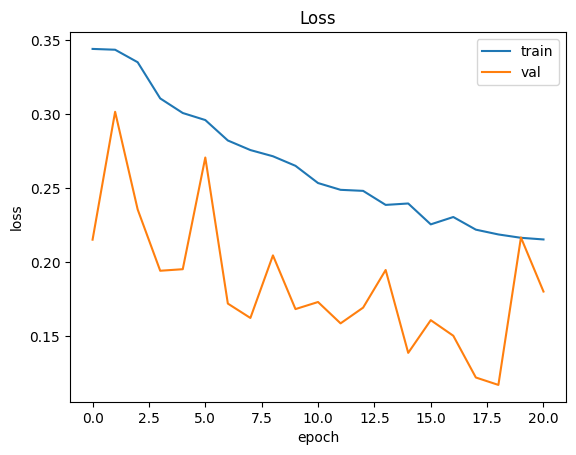

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Save Model ke TFLite

In [90]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)